# Course Code: DS4003 
# Course Name: Principles and Techniques for Data Science 
# Lab Session: 01 - Data Cleaning

### Some contents of this lab are adapted from UC Berkeley's Data100 course

This first lab is meant to introduce you to techniques related to data manipulation and data cleaning.

### Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

sns.set_theme()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = None
pd.set_option('display.precision', 2)

## Data cleaning

Read Hadley Wickham's _R for Data Science_ book: https://r4ds.had.co.nz/tidy-data.html

### Let's try our first untidy data

In [2]:
ut1 = pd.read_csv('untidy1.csv')
ut1.head()

,country year type count
0,Afghanistan 1999 cases 745
1,Afghanistan 1999 population 19987071
2,Afghanistan 2000 cases 2666
3,Afghanistan 2000 population 20595360
4,Brazil 1999 cases 37737


### Let's try to read in 'untidy1.csv'  the data with a different delimiter 


In [3]:
ut1 = pd.read_csv('untidy1.csv', sep='\\s+')
ut1.head()

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737


### Let's try another untidy dataset

In [4]:
ut2 = pd.read_csv('untidy2.csv')
ut2.head()

,country 1999 2000
0,Afghanistan 745 2666
1,Brazil 37737 80488
2,China 212258 213766


In [5]:
ut2 = pd.read_csv('untidy2.csv', sep="\\s+")
ut2.head()

,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


### From the output above we can see that 1999 and 2000 appear as column names. This doesnt look right. Let's use the melt function on these two columns to make it more tidy

Read here about the melt function: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [6]:
ut = ut2.melt(id_vars=['country'], value_vars=['1999', '2000'])
ut.head()

,country,variable,value
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488


### We still need to rename the column, we can do it while melting. 

In [7]:
ut = ut2.melt(id_vars=['country'], value_vars=['1999', '2000'], var_name='year')
ut.head()

,country,year,value
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488


## Let's look at a big untidy dataset 

In [8]:
tb = pd.read_csv('tb.csv')

In [9]:
tb.head()

,country,iso2,iso3,year,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let us take a look at the columns

In [10]:
tb.columns

Index(['country', 'iso2', 'iso3', 'year', 'newrel_m014', 'newrel_m1524',
       'newrel_m2534', 'newrel_m3544', 'newrel_m4554', 'newrel_m5564',
       'newrel_m65', 'newrel_f014', 'newrel_f1524', 'newrel_f2534',
       'newrel_f3544', 'newrel_f4554', 'newrel_f5564', 'newrel_f65'],
      dtype='object')

### The columns names are difficult to understand, let's see the metadata 

In [11]:
tb_meta = pd.read_csv('tb_meta.csv')

In [12]:
tb_meta.head()

,variable_name,dataset,code_list,definition
0,budget_cpp_dstb,Budget,NaN,Average cost of drugs budgeted per patient for...
1,budget_cpp_mdr,Budget,NaN,Average cost of drugs budgeted per patient for...
2,budget_cpp_tpt,Budget,NaN,Average cost of drugs budgeted per patient for...
3,budget_cpp_xdr,Budget,NaN,Average cost of drugs budgeted per patient for...
4,budget_fld,Budget,NaN,Budget required for drugs to treat drug-suscep...


### Let's look at the variables specific to to the columns presnt in tb

In [13]:
curr_meta = tb_meta[tb_meta['variable_name'].isin(tb.columns)]

In [14]:
curr_meta.head()

,variable_name,dataset,code_list,definition
71,country,Country identification,NaN,Country or territory name
74,iso2,Country identification,NaN,ISO 2-character country/territory code
75,iso3,Country identification,NaN,ISO 3-character country/territory code
436,newrel_f014,Notification,NaN,New and relapse cases (but only new cases if r...
440,newrel_f1524,Notification,NaN,New and relapse cases (but only new cases if r...


### the dataset and code_list colunms are not that useful, so we remove them

In [15]:
print(curr_meta.shape)
curr_meta = curr_meta.drop(columns=['dataset', 'code_list'])

(17, 4)


In [16]:
print(curr_meta.shape)
for i in range(curr_meta.shape[0]): 
    entry = curr_meta.iloc[i]
    print(f'{entry.variable_name}: {entry.definition}')



(17, 2)
country: Country or territory name
iso2: ISO 2-character country/territory code
iso3: ISO 3-character country/territory code
newrel_f014: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 0-14 years
newrel_f1524: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 15-24 years
newrel_f2534: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 25-34 years
newrel_f3544: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 35-44 years
newrel_f4554: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 45-54 years
newrel_f5564: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 55-64 years
newrel_f65: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): females aged 65 years and over
newrel_m014: New and relapse cases (but only new cases if rel_in_agesex_flg = 0): males aged 0-14 years
newre

### Now we will define some functions to tidy up the tb dataset 

In [17]:
tb.head()

,country,iso2,iso3,year,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
## define a function to drop 'iso2' and 'iso3'
def drop_iso(df):
    new_df = df.drop(columns=['iso2', 'iso3'])
    return new_df

tb_drop_iso = drop_iso(tb)
tb_drop_iso.head(20)

,country,year,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Afghanistan,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Afghanistan,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Afghanistan,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
## define a function to make a dataframe tidy using pd.melt
## use country and year as id_vars
## set var_name as 'entry'
## set value_name as 'count'

def make_tidy(df):
    new_df = df.melt(id_vars=['country', 'year'], var_name='entry', value_name='count')
    return new_df

tidy_tb = make_tidy(tb_drop_iso)
tidy_tb.head()

,country,year,entry,count
0,Afghanistan,1980,newrel_m014,NaN
1,Afghanistan,1981,newrel_m014,NaN
2,Afghanistan,1982,newrel_m014,NaN
3,Afghanistan,1983,newrel_m014,NaN
4,Afghanistan,1984,newrel_m014,NaN


### We will now introduce some new columns into our dataframe.
We will use the df.assign function. You can read more about it https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html

In [20]:
## define a function to introduce two columns 'sex' and 'agecodes'
## The values of sex and agecodes should be extracted from the 'codes' value defined in the function
## drop the entry column after you are done

def split_entry(df):
    codes = df['entry'].str.split('_').str[-1]
    sex_vals = codes.str[0]
    agecode_val = codes.str[1:]

    new_df = df.assign(sex=sex_vals)
    new_df = new_df.assign(agecode=agecode_val)

    new_df = new_df.drop(columns = ['entry'])

    return new_df

tb_new_columns = split_entry(tidy_tb)
tb_new_columns

,country,year,count,sex,agecode
0,Afghanistan,1980,NaN,m,014
1,Afghanistan,1981,NaN,m,014
2,Afghanistan,1982,NaN,m,014
...,...,...,...,...,...
101357,Zimbabwe,2011,NaN,f,65
101358,Zimbabwe,2012,NaN,f,65
101359,Zimbabwe,2013,725.0,f,65


### Now we will define a function to format the age column

In [21]:
def age_from_code(df):
    return df.assign(age=df['agecode'].replace({
        '014': '0-14',
        '04': '0-4',
        '1524': '15-24',
        '2534': '25-34',
        '3544': '35-44',
        '4554': '45-54',
        '5564': '55-64',
        '65': '65+',
    })).drop(columns='agecode')



### Run the code below to see effects of the methods you implemented

We will use the DataFrame.pipe function. You can read more about it here https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pipe.html

In [22]:
tb.head()

,country,iso2,iso3,year,newrel_m014,newrel_m1524,newrel_m2534,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tidy = (tb.pipe(drop_iso).pipe(make_tidy).pipe(split_entry).pipe(age_from_code))
tidy

,country,year,count,sex,age
0,Afghanistan,1980,NaN,m,0-14
1,Afghanistan,1981,NaN,m,0-14
2,Afghanistan,1982,NaN,m,0-14
...,...,...,...,...,...
101357,Zimbabwe,2011,NaN,f,65+
101358,Zimbabwe,2012,NaN,f,65+
101359,Zimbabwe,2013,725.0,f,65+


### Now there are a lots of NaN value in the dataframe, lets drop them 

In [24]:
# YOUR CODE HERE
df = tidy.dropna()
df.shape

(2580, 5)

### Let's select a subset of the data. Select a subset of the data that shows the average number of cases for countries that start with the letter H


In [25]:
# YOUR CODE HERE
H_countries = df.loc[df['country'].str[0] == 'H']

temp_df = H_countries[['country', 'count']]
means = temp_df.groupby(by=['country']).mean()

means

,count
country,
Haiti,1217.14
Honduras,212.93
Hungary,74.29


Tidy data is especially useful for seaborn, the plotting library we will use extensively in this course!

Create a barplot with the subset created. The x-axis should be the count and the y-axis should be the country.

<Axes: xlabel='country', ylabel='count'>

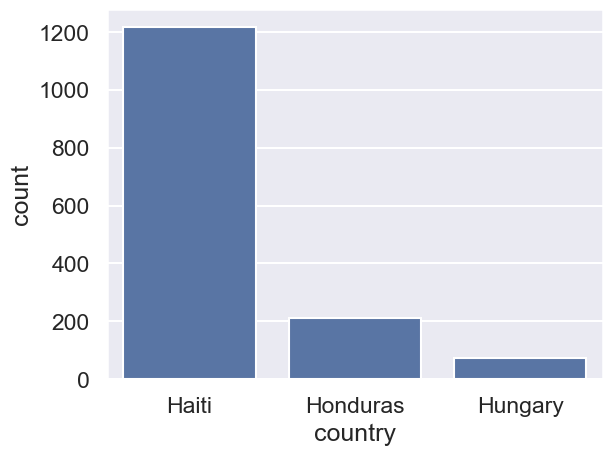

In [26]:
# YOUR CODE HERE
import seaborn as sb

sb.barplot(means['count'])

## Hierarchical Data

A lot of structured data isn't in CSV format, but in HTML, XML, JSON, YAML, etc. JSON might have a structure that Pandas can't read directly.

Here's an example: a group of people collected information about US congressional legislators in YAML format.

https://github.com/unitedstates/congress-legislators

Here's one of the data files:

https://github.com/unitedstates/congress-legislators/blob/master/legislators-current.yaml

In [27]:
import yaml
legislators_path = 'legislators-current.yaml'
legislators = yaml.safe_load(open(legislators_path))
print(len(legislators))
print(len(legislators[0]))
print(legislators[0].keys())

539
4
dict_keys(['id', 'name', 'bio', 'terms'])


As we can see below, the data is mostly stored in several dictionaries. 
Hence, to access the data, we need to access the dictionaries.

In [28]:
legislators[5]

{'id': {'bioguide': 'F000062',
  'thomas': '01332',
  'lis': 'S221',
  'govtrack': 300043,
  'opensecrets': 'N00007364',
  'votesmart': 53273,
  'fec': ['S0CA00199'],
  'cspan': 13061,
  'wikipedia': 'Dianne Feinstein',
  'house_history': 13044,
  'ballotpedia': 'Dianne Feinstein',
  'maplight': 567,
  'icpsr': 49300,
  'wikidata': 'Q230733',
  'google_entity_id': 'kg:/m/01gqws'},
 'name': {'first': 'Dianne',
  'last': 'Feinstein',
  'official_full': 'Dianne Feinstein'},
 'bio': {'birthday': '1933-06-22', 'gender': 'F', 'religion': 'Jewish'},
 'terms': [{'type': 'sen',
   'start': '1992-11-10',
   'end': '1995-01-03',
   'state': 'CA',
   'class': 1,
   'party': 'Democrat'},
  {'type': 'sen',
   'start': '1995-01-04',
   'end': '2001-01-03',
   'state': 'CA',
   'class': 1,
   'party': 'Democrat'},
  {'type': 'sen',
   'start': '2001-01-03',
   'end': '2007-01-03',
   'state': 'CA',
   'class': 1,
   'party': 'Democrat',
   'url': 'http://feinstein.senate.gov'},
  {'type': 'sen',
   's

Let's look at the data pertaining to the first legislator.

In [29]:
x = legislators[0]
x['id']

{'bioguide': 'B000944',
 'thomas': '00136',
 'lis': 'S307',
 'govtrack': 400050,
 'opensecrets': 'N00003535',
 'votesmart': 27018,
 'fec': ['H2OH13033', 'S6OH00163'],
 'cspan': 5051,
 'wikipedia': 'Sherrod Brown',
 'house_history': 9996,
 'ballotpedia': 'Sherrod Brown',
 'maplight': 168,
 'icpsr': 29389,
 'wikidata': 'Q381880',
 'google_entity_id': 'kg:/m/034s80'}

### Retrieve the name of the first legislator

In [30]:
### YOUR CODE HERE
name_legislator_1 = legislators[0]['name']['first'] + ' ' + legislators[0]['name']['last']
print(name_legislator_1)

Sherrod Brown


### Retrieve the bio of the first legislator

In [31]:
### YOUR CODE HERE
print(legislators[0]['bio'])

{'birthday': '1952-11-09', 'gender': 'M', 'religion': 'Lutheran'}


### Create a function to generate a datetime object from the birthday string associated with a legislator's birthday. Use datetime.strptime(). Test your function on the first legilator, x. You can read more about it here https://www.programiz.com/python-programming/datetime/strptime

In [32]:
### YOUR CODE HERE, mine is not so general
from datetime import datetime

def get_birthday_datetime(dict):
    birthdays = [datetime.strptime(dict[i]['bio']['birthday'], "%Y-%m-%d").date() for i in range(len(dict))]
    return birthdays

birthdays = get_birthday_datetime(legislators)
print(birthdays[0])

1952-11-09


### Create a dataframe called 'leg_df'  that has four columns 'id', 'first', 'last', and 'birthday' for all legislators. 

In [33]:
## YOUR CODE HERE

import numpy as np

data = np.array([
    [legislators[i]['id']['bioguide'] for i in range(len(legislators))],
    [legislators[i]['name']['first'] for i in range(len(legislators))],
    [legislators[i]['name']['last'] for i in range(len(legislators))],
    [birthdays[i] for i in range(len(legislators))]
])

leg_df = pd.DataFrame(data.T, columns = ['id', 'first', 'last', 'birthday'])
leg_df

,id,first,last,birthday
0,B000944,Sherrod,Brown,1952-11-09
1,C000127,Maria,Cantwell,1958-10-13
2,C000141,Benjamin,Cardin,1943-10-05
...,...,...,...,...
536,R000615,Mitt,Romney,1947-03-12
537,M001197,Martha,McSally,1966-03-22
538,G000592,Jared,Golden,1982-07-25


### Calculate the current age of the legistlators in a new column 'age'

In [34]:
### YOUR CODE HERE
from dateutil.relativedelta import relativedelta

def get_age_from_brithday(birthdays):
    today = datetime.today()
    results = []

    for i in range(len(birthdays)):
        date = birthdays[i].date()
        age = relativedelta(today, date).years
        results.append(age)

    return results

leg_df = leg_df.assign(age=get_age_from_brithday(leg_df['birthday']))
leg_df

AttributeError: 'datetime.date' object has no attribute 'date'

### Plot a histogram of the newly created age column

<Axes: xlabel='age', ylabel='Count'>

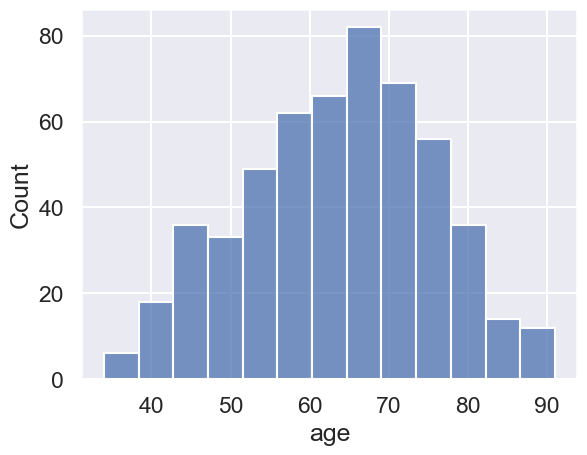

In [36]:
## YOUR CODE HERE
sb.histplot(leg
_df, x='age')

## Missing Values
The column religion from the original legistlators dataset has a few missing values. Create a new column in leg_df with the name 'religion' and extract the religion of each legislator for this colum.


In [60]:
### YOUR CODE HERE
for i in range(len(legislators)):
    leg = legislators[i]['bio']
    if 'religion' not in leg.keys():
        leg['religion']=float('nan')

leg_df = leg_df.assign(religion=[legislators[i]['bio']['religion'] for i in range(len(legislators))])
leg_df

,id,first,last,birthday,religion
0,B000944,Sherrod,Brown,1952-11-09,Lutheran
1,C000127,Maria,Cantwell,1958-10-13,Roman Catholic
2,C000141,Benjamin,Cardin,1943-10-05,Jewish
...,...,...,...,...,...
536,R000615,Mitt,Romney,1947-03-12,NaN
537,M001197,Martha,McSally,1966-03-22,NaN
538,G000592,Jared,Golden,1982-07-25,NaN


### How many null values do we have in the religion column.

In [38]:
### YOUR CODE HERE
religion_nan_count = leg_df['religion'].isna().sum()
religion_nan_count

410

### Replace the null values in religion with 'Unknown'

In [39]:
### YOUR CODE HERE
leg_df = leg_df.assign(religion=leg_df['religion'].fillna('Unknown'))
leg_df

,id,first,last,birthday,age,religion
0,B000944,Sherrod,Brown,1952-11-09,71,Lutheran
1,C000127,Maria,Cantwell,1958-10-13,65,Roman Catholic
2,C000141,Benjamin,Cardin,1943-10-05,80,Jewish
...,...,...,...,...,...,...
536,R000615,Mitt,Romney,1947-03-12,77,Unknown
537,M001197,Martha,McSally,1966-03-22,58,Unknown
538,G000592,Jared,Golden,1982-07-25,42,Unknown


## Merging Dataframes
Now we will look at how to merge dataframes. Lets read in some new data.

In [40]:
comm_path = 'committees-current.yaml'
comm_membership_path = 'committee-membership-current.yaml'

comms = yaml.safe_load(open(comm_path, encoding="utf8"))    # Had to change the encodings manually to get them to open.
comm_membership = yaml.safe_load(open(comm_membership_path, encoding="utf8"))   # Had to change the encodings manually to get them to open.

print(len(comms), len(comm_membership))

47 217


In [61]:
comms[0:10]
# thomas_id is a unique reference to the committee 

NameError: name 'comms' is not defined

### Lets create a dataframe from the commitees dataset

In [42]:
comm_df = pd.DataFrame(
    data=[[c['name'], c['thomas_id'], c['type']] for c in comms],
    columns=['name', 'thomas_id', 'type']
)
comm_df

,name,thomas_id,type
0,House Committee on Agriculture,HSAG,house
1,House Committee on Appropriations,HSAP,house
2,House Committee on Armed Services,HSAS,house
...,...,...,...
44,Senate Committee on Rules and Administration,SSRA,senate
45,Senate Committee on Small Business and Entrepr...,SSSB,senate
46,Senate Committee on Veterans' Affairs,SSVA,senate


### Now let's take a look at the commitee memberships

In [43]:
comm_membership.keys()

dict_keys(['HLIG', 'HLIG01', 'HLIG02', 'HLIG03', 'HLIG04', 'HSAG', 'HSAG03', 'HSAG14', 'HSAG15', 'HSAG16', 'HSAG22', 'HSAG29', 'HSAP', 'HSAP01', 'HSAP02', 'HSAP04', 'HSAP06', 'HSAP07', 'HSAP10', 'HSAP15', 'HSAP18', 'HSAP19', 'HSAP20', 'HSAP23', 'HSAP24', 'HSAS', 'HSAS02', 'HSAS03', 'HSAS06', 'HSAS25', 'HSAS26', 'HSAS28', 'HSAS29', 'HSBA', 'HSBA01', 'HSBA04', 'HSBA09', 'HSBA15', 'HSBA16', 'HSBA20', 'HSBU', 'HSED', 'HSED02', 'HSED10', 'HSED13', 'HSED14', 'HSFA', 'HSFA05', 'HSFA07', 'HSFA13', 'HSFA14', 'HSFA16', 'HSFA18', 'HSGO', 'HSGO06', 'HSGO24', 'HSGO25', 'HSGO27', 'HSGO28', 'HSGO29', 'HSHA', 'HSHM', 'HSHM05', 'HSHM07', 'HSHM08', 'HSHM09', 'HSHM11', 'HSHM12', 'HSIF', 'HSIF02', 'HSIF03', 'HSIF14', 'HSIF16', 'HSIF17', 'HSIF18', 'HSII', 'HSII06', 'HSII10', 'HSII13', 'HSII15', 'HSII24', 'HSJU', 'HSJU01', 'HSJU03', 'HSJU05', 'HSJU08', 'HSJU10', 'HSPW', 'HSPW02', 'HSPW05', 'HSPW07', 'HSPW12', 'HSPW13', 'HSPW14', 'HSRU', 'HSRU02', 'HSRU04', 'HSSM', 'HSSM23', 'HSSM24', 'HSSM25', 'HSSM26', 'HS

In [44]:
comm_membership['HSAG'][0]

{'name': 'K. Michael Conaway',
 'party': 'majority',
 'rank': 1,
 'title': 'Chair',
 'thomas': '01805',
 'bioguide': 'C001062'}

### Now let's create a dataframe from the commitee memberships dataset

In [45]:
member_df = pd.DataFrame(
    data=[[c, m['bioguide']] for c, members in comm_membership.items() for m in members],
    columns=['comm_id', 'leg_id']
)
member_df

,comm_id,leg_id
0,HLIG,N000181
1,HLIG,C001062
2,HLIG,K000210
...,...,...
3268,SSVA,B001277
3269,SSVA,H001042
3270,SSVA,M001183


In [46]:
comm_df

,name,thomas_id,type
0,House Committee on Agriculture,HSAG,house
1,House Committee on Appropriations,HSAP,house
2,House Committee on Armed Services,HSAS,house
...,...,...,...
44,Senate Committee on Rules and Administration,SSRA,senate
45,Senate Committee on Small Business and Entrepr...,SSSB,senate
46,Senate Committee on Veterans' Affairs,SSVA,senate


### Merge the member-df with comm_df on 'comm_id' and 'thomas_id'. Name it member_comm

Read more about pd.merge here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [47]:
### YOUR CODE HERE
member_df = member_df.rename(columns={'comm_id': 'thomas_id'})

member_comm = pd.merge(comm_df, member_df, on='thomas_id')

member_comm = member_comm.rename(columns={'name': 'committee'})
member_comm

,committee,thomas_id,type,leg_id
0,House Committee on Agriculture,HSAG,house,C001062
1,House Committee on Agriculture,HSAG,house,L000491
2,House Committee on Agriculture,HSAG,house,K000362
...,...,...,...,...
1061,Senate Committee on Veterans' Affairs,SSVA,senate,B001277
1062,Senate Committee on Veterans' Affairs,SSVA,senate,H001042
1063,Senate Committee on Veterans' Affairs,SSVA,senate,M001183


### Count the number of legistlators belonging to each committee.

In [48]:
### YOUR CODE HERE
counts = member_comm.groupby(by=['committee']).count()
counts

,thomas_id,type,leg_id
committee,,,
Commission on Security and Cooperation in Europe,14,14,14
House Committee on Agriculture,40,40,40
House Committee on Appropriations,44,44,44
...,...,...,...
Senate Select Committee on Intelligence,19,19,19
Senate Special Committee on Aging,12,12,12
United States Senate Caucus on International Narcotics Control,5,5,5


### Merge member_comm with with leg_df on 'leg_id',  and 'id'

In [49]:
### YOUR CODE HERE
member_comm = member_comm.rename(columns={'leg_id':'id'})

merge_membercomm_legdf = pd.merge(member_comm, leg_df, on='id')
merge_membercomm_legdf

,committee,thomas_id,type,id,first,last,birthday,age,religion
0,House Committee on Agriculture,HSAG,house,C001062,K.,Conaway,1948-06-11,76,Baptist
1,House Committee on Agriculture,HSAG,house,L000491,Frank,Lucas,1960-01-06,64,Baptist
2,House Committee on Agriculture,HSAG,house,K000362,Steve,King,1949-05-28,75,Roman Catholic
...,...,...,...,...,...,...,...,...,...
1061,Senate Committee on Veterans' Affairs,SSVA,senate,B001277,Richard,Blumenthal,1946-02-13,78,Unknown
1062,Senate Committee on Veterans' Affairs,SSVA,senate,H001042,Mazie,Hirono,1947-11-03,76,Unknown
1063,Senate Committee on Veterans' Affairs,SSVA,senate,M001183,Joe,Manchin,1947-08-24,77,Unknown


### Compute the average age of legislators in each committee

In [65]:
### YOUR CODE HERE
grouped = merge_membercomm_legdf.groupby(by=['committee'])
average_ages = grouped['age'].mean().sort_values()
average_ages

committee
House Committee on House Administration                           59.83
House Permanent Select Committee on Intelligence                  59.89
Joint Economic Committee                                          60.13
                                                                  ...  
Joint Committee on Taxation                                       76.20
Joint Committee on the Library                                    78.71
United States Senate Caucus on International Narcotics Control    80.40
Name: age, Length: 47, dtype: float64

## Missing Values

* Drop the data with missing values (we did that for previous examples)
* Estimate the missing value
    1. use mean, median or mode 
    2. Use inference engine to estimate 
    3. Some values should not be estimated (e.g., religion in previous example)
* Zero fill or value fill 

## Random Sampling 

if we use pandas, we can simply use sample function. Read more here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [51]:
# sample 20% of data from the tidy dataframe
A = tidy.sample(frac=0.2)
print(A.shape, tidy.shape)

# sample 20 data 
B = tidy.sample(n=20)
print(B.shape, tidy.shape)

(20272, 5) (101360, 5)
(20, 5) (101360, 5)


## What if we need to randomly sample images or files. for example files in the current directory?
We can use the Python funtion random. Read more about random here

In [52]:
import os 
import random 
files = os.listdir(".")

In [53]:
print(files)

['.DS_Store', '.ipynb_checkpoints', '.OTTER_LOG', 'committee-membership-current.yaml', 'committees-current.yaml', 'elections.csv', 'elections.json', 'LAB01.ipynb', 'legislators-current.yaml', 'tb.csv', 'TB_data_dictionary_2019-06-27.csv', 'tb_meta.csv', 'tidy.csv', 'untidy1.csv', 'untidy2.csv']


### Files is a list files in your current working directory. Sample 2 random files from your files directiory and print their names.  

In [54]:
### YOUR CODE HERE
files_df = pd.DataFrame(data=files, columns=['files in directory'])
selected_files = files_df.sample(n=2, random_state=42)
selected_files

,files in directory
9,tb.csv
11,tb_meta.csv


## What if we have to sample data from numpy array 
We can use np.random. Read more about it here https://numpy.org/doc/stable/reference/random/index.html. 

### First use any two np.random functions to generate an array of random numbers

In [55]:
### YOUR CODE HERE
rand_arr_1 = np.random.uniform(-1, 1, 100)
rand_arr_2 = np.random.normal(-1, 1, 100)

### Randomly sample 3 elements without replacement

In [56]:
### YOUR CODE HERE
sample_rand_arr_1 = np.random.choice(rand_arr_1, 3, replace=False)
sample_rand_arr_1

array([-0.74, -0.75,  0.01])

### Randomly sample 3 elements with replacement

In [57]:
### YOUR CODE HERE
sample_rand_arr_2 = np.random.choice(rand_arr_2, 3, replace=True)
sample_rand_arr_2

array([ 0.31,  0.18, -2.94])